In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats


In [3]:
d1 = "C:/Users/muril/OneDrive/Documents/Data Science/Proyecto DS/Microsoft Azure Predictive Maintenance/PdM_telemetry.csv"
d2 = "C:/Users/muril/OneDrive/Documents/Data Science/Proyecto DS/Microsoft Azure Predictive Maintenance/PdM_errors.csv"
d3 = "C:/Users/muril/OneDrive/Documents/Data Science/Proyecto DS/Microsoft Azure Predictive Maintenance/PdM_maint.csv"
d4 = "C:/Users/muril/OneDrive/Documents/Data Science/Proyecto DS/Microsoft Azure Predictive Maintenance/PdM_failures.csv"
d5 = "C:/Users/muril/OneDrive/Documents/Data Science/Proyecto DS/Microsoft Azure Predictive Maintenance/PdM_machines.csv"

In [4]:
telemetry_df = pd.read_csv(d1)
errors_df = pd.read_csv(d2)
maint_df = pd.read_csv(d3)
failures_df = pd.read_csv(d4)
machines_df = pd.read_csv(d5)

In [2]:
# Otra opcion de carga para lectura de los datos
'''telemetry_df = pd.read_csv('PdM_telemetry.csv')
errors_df = pd.read_csv('PdM_errors.csv')
maint_df = pd.read_csv('PdM_maint.csv')
failures_df = pd.read_csv('PdM_failures.csv')
machines_df = pd.read_csv('PdM_machines.csv')'''

# ABSTRACT
Las empresas buscan como aumentar el tiempo de servicio de las maquinas, reducir las paradas inesperadas, reducir costos de mantenimiento, aumentar la eficacia de máquinas individuales o líneas de producción y reducir el backlog (tiempo necesario para realizar el trabajo actual).
Todo esto lleva a la necesidad de encontrar formas más precisa de conocer o predecir el comportamiento futuro de la maquinaria basándose desde la adquisición y análisis de datos e información que se puede obtener a través del monitoreo real y continuo de la condición de trabajo de los equipos. 

Cuando se tiene disponibles datos sobre ciertos parámetros de funcionamiento de las maquinarias,el empleo de modelos de machine learning pueden ayudar a resolver algunos problemas a los que se enfrentan en el tiempo operativo, los gestores de mantenimiento, como ser:

- Existe alguna relacion entre los parametros monitoreados de las maquinas que permita modelar ese efecto?
-	Se podrían configurar alertas sobre comportamiento irregular en la maquinaria captando las variaciones en los valores habituales de los datos que provocan los efectos de una condición de falla inminente.
-	La posibilidad de realizar diagnóstico de tipos de fallas, prevención de las fallas, planificar y gestionar acciones correctivas o de mitigación de tareas de mantenimiento para evitar los eventos de falla.



## Contexto Comercial
La falla de un equipamiento puede implicar el daño de los componentes electrónicos en alguna parte del proceso lo que traería como consecuencia el tener que reciclar el material y volver a empezar el proceso desde el inicio. Adicionalmente a esto, un equipo con falla podría interrumpir otras etapas de los procesos generando atrasos y perdidas superlativas debido a la interrelación de los procesos entre si.


## Problema Comercial
Es de suma importancia que las fallas incipientes en los equipos puedan ser atendidas antes de que se genere la perdida de la función deseada. De aquí, la necesidad de mitigar o reducir la probabilidad de ocurrencia de fallas con el objetivo de minimizar las paradas no planificadas tanto como sea posible

# EDA

In [4]:
telemetry_df.head(3)

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847


In [5]:
errors_df.head(3)

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5


In [9]:
maint_df.head(3)

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3


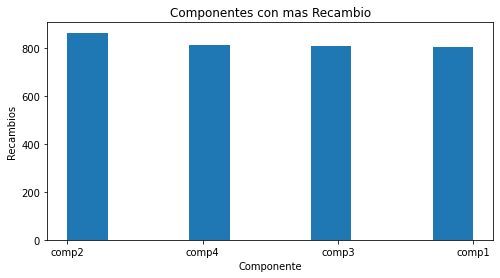

In [39]:
fig, ax = plt.subplots(figsize = (8,4))
ax.hist(maint_df['comp'])
ax.set_title('Componentes con mas Recambio')
ax.set_xlabel('Componente')
ax.set_ylabel('Recambios')
plt.show()

In [10]:
failures_df.head(3)

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2


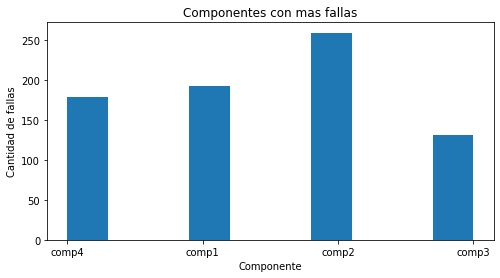

In [37]:
fig, ax = plt.subplots(figsize = (8,4))
ax.hist(failures_df['failure'])
ax.set_title('Componentes con mas fallas')
ax.set_xlabel('Componente')
ax.set_ylabel('Cantidad de fallas')
plt.show()

In [11]:
machines_df.head(3)

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8


In [ ]:
!pip install -U dataprep

In [ ]:
from dataprep.eda import create_report
report = create_report(telemetry_df, title='Reporte Telemetria')

Reporte Telemetria
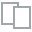
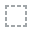
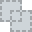
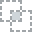
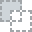
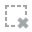
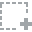
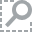
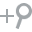
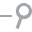
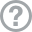
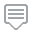
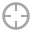
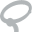
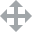
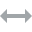
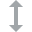
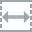
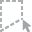
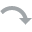
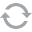
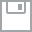
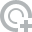
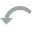
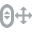
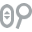
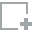
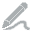
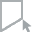
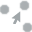
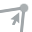
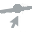

In [ ]:
report

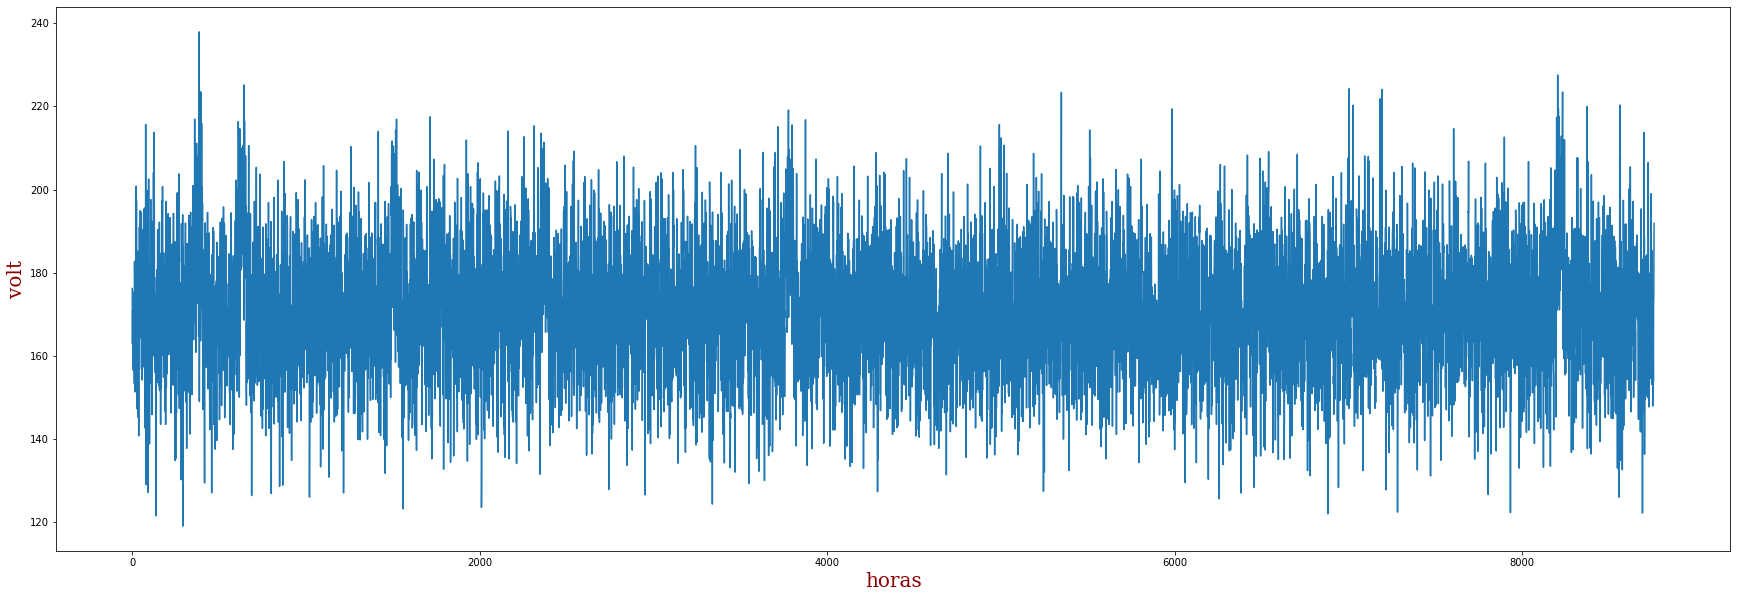

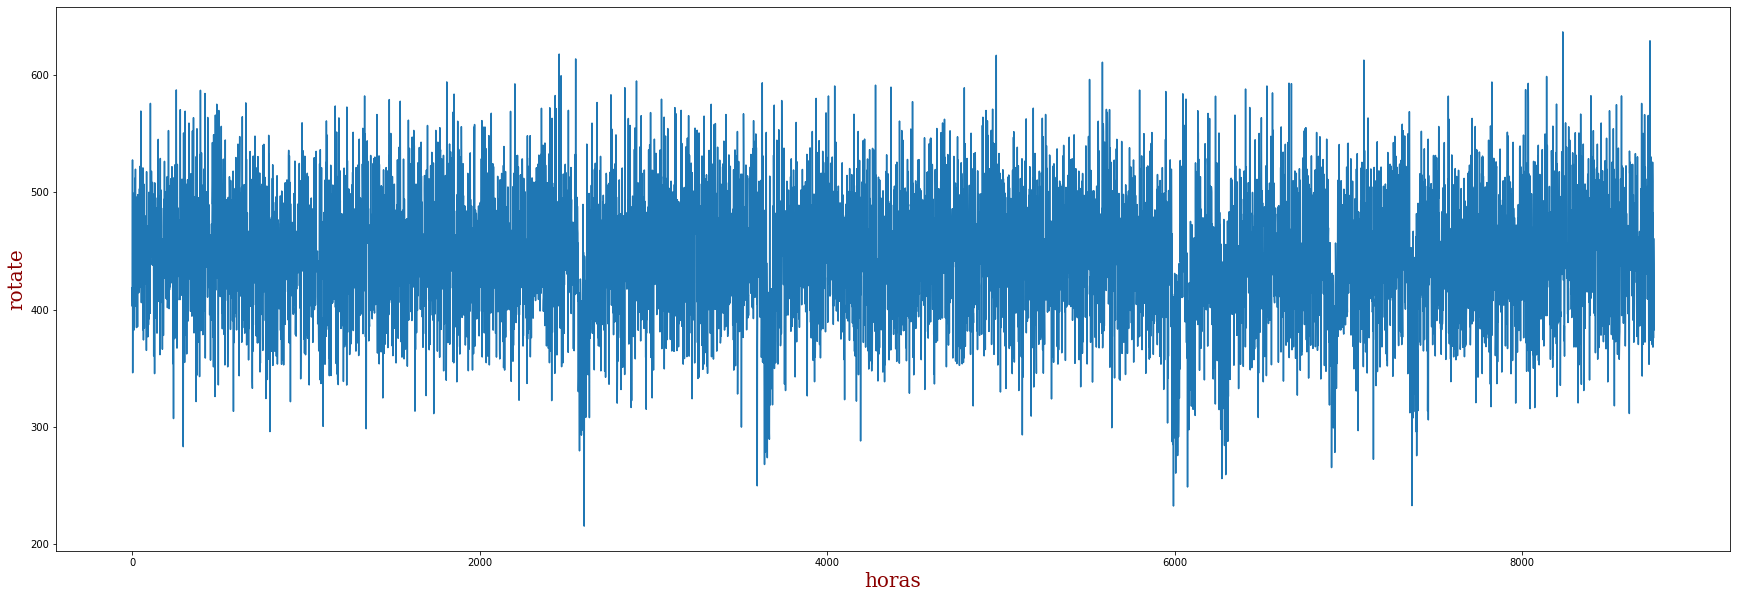

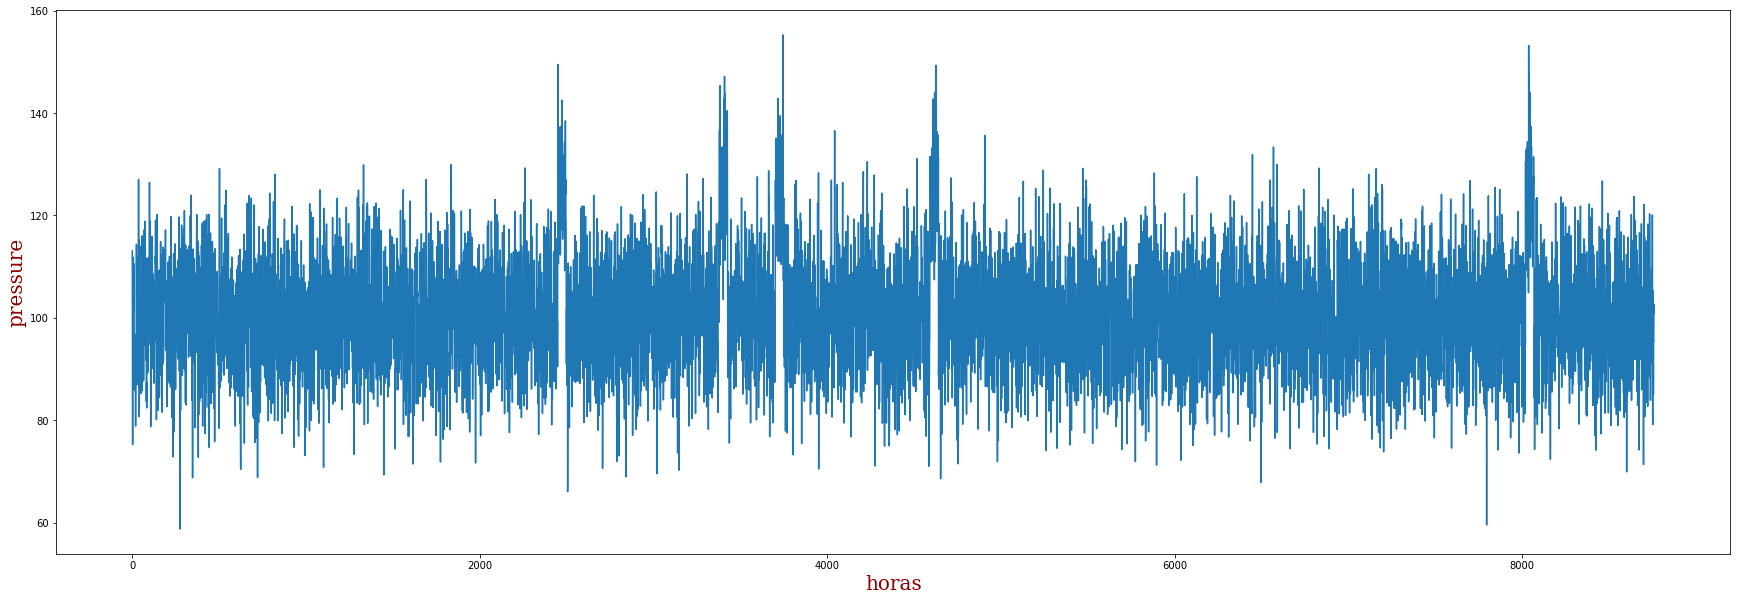

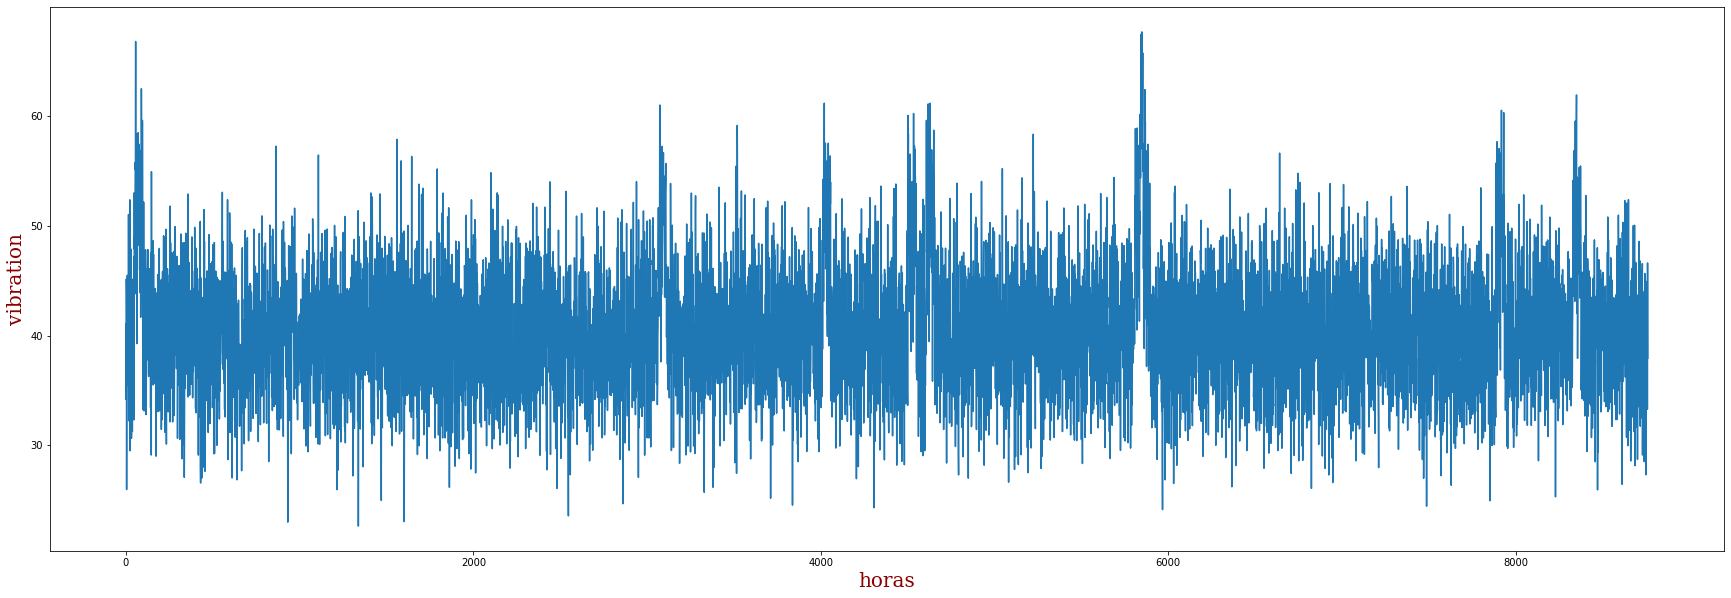

In [13]:
# Paramatros de telemetria para un equipo Machine 7
tele_machine_7=telemetry_df[telemetry_df['machineID']==7]
date_time= range(0,len(tele_machine_7))
for i in range(2,6):
 fig=plt.figure(figsize=(30,10))
 plt.plot(date_time,telemetry_df.iloc[:len(tele_machine_7),i])
 plt.ylabel(telemetry_df.columns[i],fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
 plt.xlabel('horas',fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})

In [233]:
#Funcion para convertir el formato de la fecha de las tablas
tablas = [telemetry_df, maint_df, failures_df, errors_df]
for df in tablas:
    df["datetime"] = pd.to_datetime(df["datetime"], format="%Y-%m-%d %H:%M:%S")

In [6]:
print('El total de registros de telemetria es:' ,telemetry_df.shape)
print('El total de registros de mantenimientos es:',maint_df.shape)
print('El total de registros de fallas es:',failures_df.shape)
print('El total de registros de errores es:',errors_df.shape)

El total de registros de telemetria es: (876100, 6)
El total de registros de mantenimientos es: (3286, 3)
El total de registros de fallas es: (761, 3)
El total de registros de errores es: (3919, 3)


In [8]:
print('Cantidad unica de maquinas:' ,telemetry_df.machineID.nunique())

Cantidad unica de maquinas: 100


Las instancias de los parametros de funcionamiento no presentan valores nulos

In [ ]:
telemetry_df.isna().sum()

datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64

Los registros de la tabla telemetry van de enero del 2015 al primer dia del 2016

In [ ]:
# Cual es marco temporal de la data telemetry
telemetry_df.datetime.describe(datetime_is_numeric=True)

count                           676578
mean     2015-07-02 08:04:27.055683328
min                2015-01-01 06:00:00
25%                2015-04-01 16:00:00
50%                2015-07-02 05:00:00
75%                2015-10-01 18:00:00
max                2016-01-01 06:00:00
Name: datetime, dtype: object

In [235]:
telemetry_df.head(5)

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


En los registros de Mantenimiento se pueden encontrar datos del año 2014

In [ ]:
maint_df.datetime.describe(datetime_is_numeric=True)

count                             3286
mean     2015-05-30 14:40:36.518563840
min                2014-06-01 06:00:00
25%                2015-03-03 06:00:00
50%                2015-06-13 06:00:00
75%                2015-09-18 00:00:00
max                2016-01-01 06:00:00
Name: datetime, dtype: object

In [ ]:
telemetry_df.corr()

,machineID,volt,rotate,pressure,vibration
machineID,1.000000,-0.001037,0.000171,0.005192,-0.000922
volt,-0.001037,1.000000,-0.001511,0.001652,0.002390
rotate,0.000171,-0.001511,1.000000,-0.000688,-0.003056
pressure,0.005192,0.001652,-0.000688,1.000000,0.001395
vibration,-0.000922,0.002390,-0.003056,0.001395,1.000000


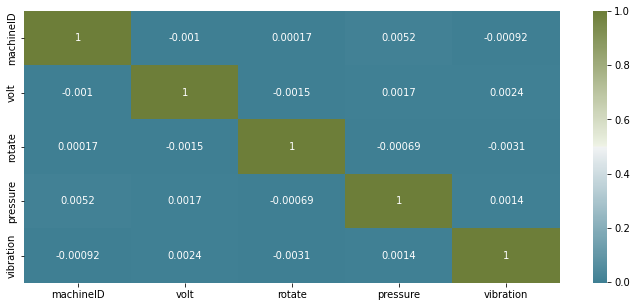

In [7]:
# calculate correlation matrix
corr0 = telemetry_df.corr()# plot the heatmap
plt.figure(figsize = (12,5))
sns.heatmap(corr0, xticklabels=corr0.columns, yticklabels=corr0.columns, annot=True, cmap=sns.diverging_palette(220, 100, as_cmap=True))

Como se observa en la matriz de correlacion, los valores son muy cercanos a cero, indicando la no dependencia de los parametros estudiados. 

## Analisis sobre eventos de intervencion de mantenimiento(fallas, errores, mantenimientos)

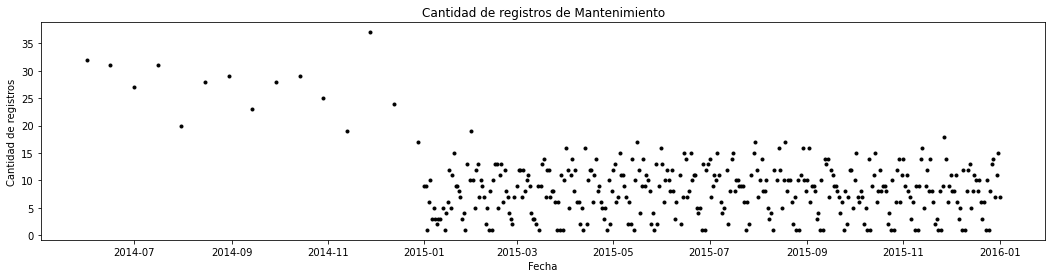

In [ ]:
maint_df.datetime.dt.date.value_counts().plot(
    style="k.", 
    figsize=(18, 4), 
    title="Cantidad de registros de Mantenimiento")
plt.ylabel("Cantidad de registros")
plt.xlabel("Fecha")
plt.show()

Se puede observar como aumentó la frecuencia de las intervenciones de mantenimiento a los equipos durante el año 2015. Sin embargo esto puede deberse a muchos motivos como falta de una politica de registro de las fallas durante el 2014,ausencia de un programa confiable de registro de intervenciones, etc

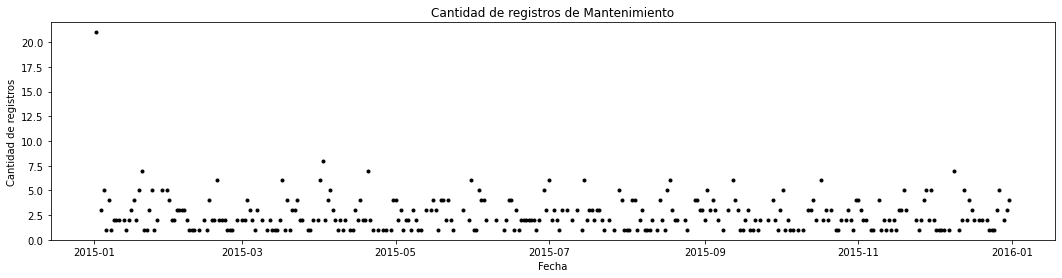

In [251]:
failures_df.datetime.dt.date.value_counts().plot(
    style="k.", 
    figsize=(18, 4), 
    title="Cantidad de registros de Mantenimiento")
plt.ylabel("Cantidad de registros")
plt.xlabel("Fecha")
plt.show()

## Existira alguna relacion entre la cantidad de mantenimiento, cantidad de errores y la edad?

In [253]:
errors_df.head(2)

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3


In [256]:
# Unir la tabla que contiene la informacion de las maquinas con la informacion de los errores
maquinaria_eventos_df = pd.merge(telemetry_df, errors_df, how='left', on="machineID")
maquinaria_eventos_df

,datetime_x,machineID,volt,rotate,pressure,vibration,datetime_y,errorID
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015-01-03 07:00:00,error1
1,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015-01-03 20:00:00,error3
2,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015-01-04 06:00:00,error5
3,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015-01-10 15:00:00,error4
4,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015-01-22 10:00:00,error4
...,...,...,...,...,...,...,...,...
34334354,2016-01-01 06:00:00,100,171.336037,496.096870,79.095538,37.845245,2015-11-21 08:00:00,error2
34334355,2016-01-01 06:00:00,100,171.336037,496.096870,79.095538,37.845245,2015-12-04 02:00:00,error1
34334356,2016-01-01 06:00:00,100,171.336037,496.096870,79.095538,37.845245,2015-12-08 06:00:00,error2
34334357,2016-01-01 06:00:00,100,171.336037,496.096870,79.095538,37.845245,2015-12-08 06:00:00,error3


In [257]:
maquinaria_eventos_df.isnull().sum()

datetime_x    0
machineID     0
volt          0
rotate        0
pressure      0
vibration     0
datetime_y    0
errorID       0
dtype: int64

Aca podemos ver cuales maquinas y de que modelos son los que presentan mayor numero de fallas

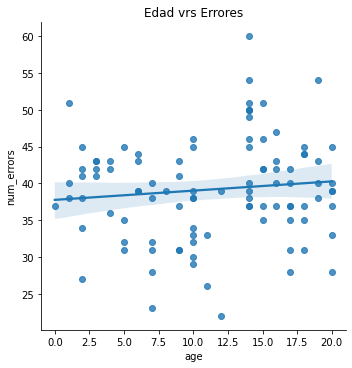

In [ ]:
sns.lmplot(x='age', y = 'num_errors', data= maquinaria_eventos_df).set(title='Edad vrs Errores')

No se puede apreciar mayor relacion entre estas dos variables

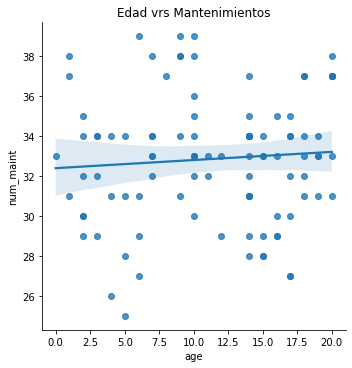

In [ ]:
sns.lmplot(x='age', y = 'num_maint', data= maquinaria_eventos_df).set(title='Edad vrs Mantenimientos')

Similar a la grafica anterior (age-errors) aca tampoco se aprecia una correlacion entre las variables estudiadas.

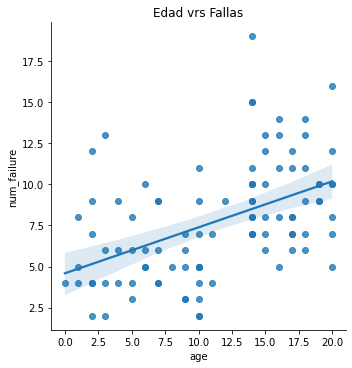

In [ ]:
sns.lmplot(x='age', y = 'num_failure', data= maquinaria_eventos_df).set(title='Edad vrs Fallas')

A diferencia de las otras graficas estudiada y talvez como era de esperarse, aca si se puede observar algun tipo de relacion entre la edad de las maquinas y la cantidad de fallas que registran. Sin embargo, tambien se observa valores muy dispersos.

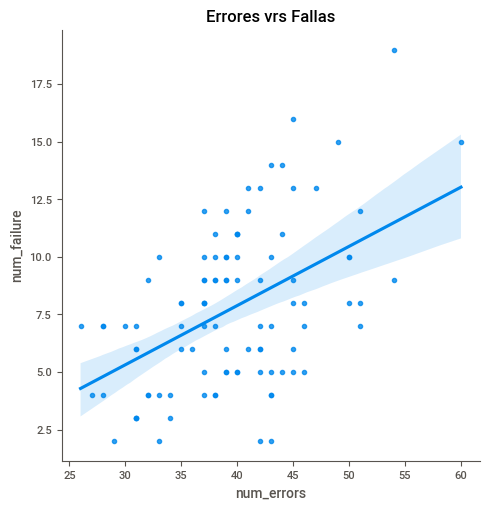

In [ ]:
sns.lmplot(x='num_errors', y = 'num_failure', data= maquinaria_eventos_df).set(title='Errores vrs Fallas')

Como lo muestra la grafica, hay alguna correlacion entre la edad y las fallas. Pero tambien se puede observar alguna correlacion entre los eventos de errores y las fallas.

In [ ]:
maquinaria_eventos_df.corr()

,machineID,age,num_errors,num_maint,num_failure
machineID,1.000000,0.100196,0.107982,-0.077903,0.096496
age,0.100196,1.000000,0.106931,0.075445,0.476459
num_errors,0.107982,0.106931,1.000000,-0.026558,0.483735
num_maint,-0.077903,0.075445,-0.026558,1.000000,-0.030258
num_failure,0.096496,0.476459,0.483735,-0.030258,1.000000


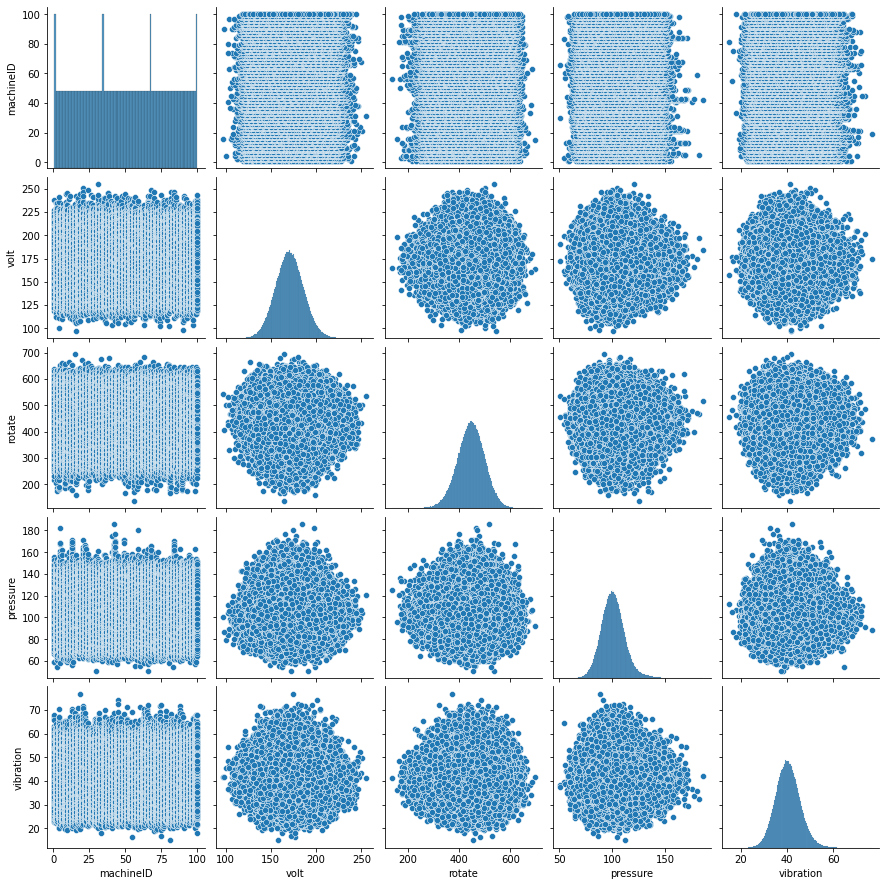

In [ ]:
sns.pairplot (telemetry_df)

En este pairplot se pueden observar como se distribuyen todos los valores de los parametros de funcionamiento registrados. Se pueden observar como algunos parametros muestran algunos valores un poco alejados de la media. Seran estos puntos evidencia de una falla?

In [ ]:
telemetry_df.nlargest(10,'vibration')

,datetime,machineID,volt,rotate,pressure,vibration
159976,2015-04-06 04:00:00,19,174.840612,373.066912,88.172375,76.791072
385504,2015-01-02 02:00:00,45,201.023064,487.681597,91.665983,73.948949
385524,2015-01-02 22:00:00,45,180.295897,435.583643,110.197020,72.335124
653385,2015-07-31 13:00:00,75,182.932649,320.885082,106.370366,71.972128
573049,2015-05-30 14:00:00,66,194.938019,472.430625,101.707816,71.949134
181495,2015-09-19 17:00:00,21,187.571417,407.162076,99.166685,71.752014
765199,2015-05-05 22:00:00,88,166.727672,403.553630,94.233712,71.751134
645599,2015-09-10 04:00:00,74,138.103104,512.076404,108.107355,71.601768
440720,2015-04-22 12:00:00,51,165.211271,544.775757,116.775549,71.182495
522510,2015-08-23 01:00:00,60,140.188130,447.091985,93.716004,71.049543


Se observa que la maquina19 registra el valor mas alto de vibracion. Podra existir alguna relacion entre la lectura de la vibracion y los episodios de falla presantados por esa maquina?

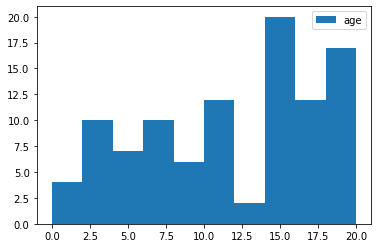

In [ ]:
machines_df['age'].hist(grid=False, legend=True) # Distribucion de la edad de la maquinaria

In [22]:
pd.merge(telemetry_df,failures_df, how = 'inner') # Este dataframe solo incluye las instancias con fallas

,datetime,machineID,volt,rotate,pressure,vibration,failure
0,2015-01-05 06:00:00,1,179.303153,499.777962,111.833028,52.383097,comp4
1,2015-03-06 06:00:00,1,198.257975,456.862342,89.333995,38.671900,comp1
2,2015-04-20 06:00:00,1,180.050801,346.362480,105.661164,39.218055,comp2
3,2015-06-19 06:00:00,1,187.673963,493.005160,105.334392,53.963961,comp4
4,2015-09-02 06:00:00,1,144.094532,409.380150,106.720871,57.454990,comp4
...,...,...,...,...,...,...,...
756,2015-11-29 06:00:00,99,205.336154,398.728678,116.164197,35.588661,comp3
757,2015-12-14 06:00:00,99,152.143212,394.182739,114.212265,40.852043,comp4
758,2015-02-12 06:00:00,100,226.666914,484.516473,97.521897,53.129437,comp1
759,2015-09-10 06:00:00,100,201.781023,520.820195,90.944571,39.066892,comp1


In [9]:
! pip install sweetviz

     --------------------------------------- 15.1/15.1 MB 32.8 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 133.1/133.1 kB 7.7 MB/s eta 0:00:00


In [10]:
import sweetviz as sv

c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
report1 = sv.analyze(telemetry_df)
report1.show_html()

![](https://drive.google.com/uc?export=view&id=1pNpNwEcGmR1tO30HDE9T6UOr3rKXb1b1)

# DESAFIO n13: Evaluacion de modelos de ML

Se revisan los datos y se encuentra cual es el modelo que presenta mayor numero de instancias de fallas y el componente con mas falla. 
Resualtando que son: modelo3 y componente2

In [260]:
# Se transformaron los atributos categoricos de las fallas a numericos 
prueba = pd.merge(telemetry_df,failures_df, how = 'outer')
prueba.head(3)


,datetime,machineID,volt,rotate,pressure,vibration,failure
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,NaN
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,NaN
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,NaN


In [261]:
prueba.shape

(876142, 7)

In [262]:
prueba['failure'].value_counts()

comp2    259
comp1    192
comp4    179
comp3    131
Name: failure, dtype: int64

In [263]:
df_dum1 = pd.get_dummies(prueba, columns=['failure'], prefix = 'fail')
df_dum1.head(5)

,datetime,machineID,volt,rotate,pressure,vibration,fail_comp1,fail_comp2,fail_comp3,fail_comp4
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,0,0,0,0
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,0,0,0,0
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,0,0,0,0
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,0,0,0,0
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,0,0,0,0


In [269]:
df_dum1['fail_comp2'].value_counts()  # El comp2 es el que presenta mas fallas

0    875883
1       259
Name: fail_comp2, dtype: int64

In [277]:
df_dum2 =pd.merge(df_dum1,machines_df, how='outer')
df_dum2.head(3)

,datetime,machineID,volt,rotate,pressure,vibration,fail_comp1,fail_comp2,fail_comp3,fail_comp4,model,age
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,0,0,0,0,model3,18
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,0,0,0,0,model3,18
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,0,0,0,0,model3,18


In [278]:
xx = df_dum2[df_dum2.fail_comp2 == 1]
xx.head(5)

,datetime,machineID,volt,rotate,pressure,vibration,fail_comp1,fail_comp2,fail_comp3,fail_comp4,model,age
2616,2015-04-20 06:00:00,1,180.050801,346.362480,105.661164,39.218055,0,1,0,0,model3,18
6936,2015-10-17 06:00:00,1,178.322428,383.715256,79.704008,43.213417,0,1,0,0,model3,18
10610,2015-03-19 06:00:00,2,179.277874,322.388170,118.153934,47.415885,0,1,0,0,model4,7
11330,2015-04-18 06:00:00,2,173.166422,379.976049,101.382419,49.585502,0,1,0,0,model4,7
17450,2015-12-29 06:00:00,2,176.146239,317.711059,94.845424,48.679263,0,1,0,0,model4,7


In [279]:
xx['model'].value_counts() # El model3 es el que presenta mas fallas

model3    89
model4    83
model1    46
model2    41
Name: model, dtype: int64

In [280]:
df_dum2['model'].isnull().sum()

0

In [303]:
xxx = df_dum2[df_dum2.model == 'model3']
xxx.head(5)

,datetime,machineID,volt,rotate,pressure,vibration,fail_comp1,fail_comp2,fail_comp3,fail_comp4,model,age
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,0,0,0,0,model3,18
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,0,0,0,0,model3,18
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,0,0,0,0,model3,18
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,0,0,0,0,model3,18
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,0,0,0,0,model3,18


In [305]:

xxx = xxx.sort_values(by=['machineID','datetime'], ascending=[True, True])

xxx['flipper'] = np.where((xxx.machineID != xxx.machineID.shift(1)), 1, 0)
xxx.head()

,datetime,machineID,volt,rotate,pressure,vibration,fail_comp1,fail_comp2,fail_comp3,fail_comp4,model,age,flipper
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,0,0,0,0,model3,18,1
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,0,0,0,0,model3,18,0
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,0,0,0,0,model3,18,0
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,0,0,0,0,model3,18,0
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,0,0,0,0,model3,18,0


In [306]:
xxx.drop(['datetime','machineID', 'fail_comp1', 'fail_comp3', 'fail_comp4' , 'model'  , 'flipper' ], axis = 1 , inplace= True)


In [307]:
xxx.head(3)

,volt,rotate,pressure,vibration,fail_comp2,age
0,176.217853,418.504078,113.077935,45.087686,0,18
1,162.879223,402.747490,95.460525,43.413973,0,18
2,170.989902,527.349825,75.237905,34.178847,0,18


In [309]:
xxx.shape

(306644, 6)

In [319]:
X = xxx.drop(['fail_comp2'] , axis = 1).values
X

array([[176.21785302, 418.50407822, 113.07793546,  45.08768576,
         18.        ],
       [162.8792229 , 402.74748957,  95.46052538,  43.41397268,
         18.        ],
       [170.98990241, 527.34982545,  75.23790486,  34.17884712,
         18.        ],
       ...,
       [182.86711866, 491.58448046,  90.33264261,  58.59271036,
         18.        ],
       [166.9435448 , 352.04713842,  82.068954  ,  46.25636121,
         18.        ],
       [186.32446413, 459.33785646, 114.54240098,  48.19124545,
         18.        ]])

In [320]:
y = xxx['fail_comp2'].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

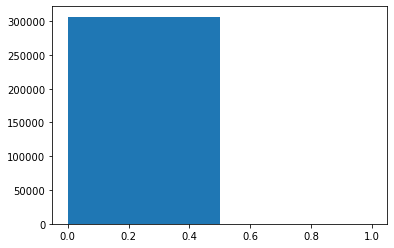

In [321]:
plt.hist(y , bins=2)
plt.show()

## Dividiendo el dataset en train y test

In [322]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify= y)

In [323]:
print(X_test)

[[159.16677682 371.09522651 108.95960109  44.44555387  16.        ]
 [163.46937896 458.33790447  83.71425101  36.48326007  19.        ]
 [170.99434159 411.40662204  89.99966799  33.07598339  14.        ]
 ...
 [174.88473025 447.01263014 102.60472391  36.1427962    7.        ]
 [188.23714772 420.14516986  96.57541389  44.72440031   7.        ]
 [170.80018786 465.9627703  109.82301544  43.42251788  17.        ]]


In [324]:
print(y_train)

[0 0 0 ... 0 0 0]


## Feature Scaling

In [325]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [326]:
print(X_train)

[[ 0.18848837 -1.06042626  1.02095353 -1.21556459 -0.54859728]
 [-0.13104258 -0.89523779  0.3324906  -0.68381592  0.35595624]
 [ 0.09362755 -0.81690832 -1.53341202 -0.42895607  1.07959906]
 ...
 [ 0.23103551 -0.20849959  0.33684789 -1.00215618  0.89868836]
 [ 1.44286023  0.31851433  0.73715062  0.03364008  1.44142047]
 [ 1.10685701 -0.29931507  0.02978892 -0.52649272 -0.91041869]]


In [327]:
print(X_test)

[[-0.75271938 -1.4313518   0.76427707  0.75648239  0.71777765]
 [-0.47527789  0.22456366 -1.55929413 -0.73003466  1.26050977]
 [ 0.00994866 -0.66621867 -0.98078705 -1.36615473  0.35595624]
 ...
 [ 0.2608097   0.00960353  0.1793769  -0.79359742 -0.91041869]
 [ 1.12180368 -0.50035608 -0.37555821  0.8085415  -0.91041869]
 [-0.00257081  0.36928793  0.84374535  0.56548712  0.89868836]]


In [328]:
print(y_train)

[0 0 0 ... 0 0 0]


In [329]:
#Aplicacion de PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [330]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.20344662, 0.20050835, 0.20002573, 0.19978325, 0.19623605])

Luego de aplicado el PCA podemos ver que cada una de las 5 variables dependientes explican aprox. 20% de la varianza en el conjunto de datos

## Entrenando el modelo

### Regresion Logistica

In [331]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42 , solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [332]:
classifier.coef_

array([[-0.06891315, -0.52377394,  0.93950115,  0.36908915, -0.15832029]])

In [333]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Metodo 0 (sin aplicar tecnicas de balanceo)

LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     91994
           1       0.00      0.00      0.00         0

    accuracy                           1.00     91994
   macro avg       0.50      0.50      0.50     91994
weighted avg       1.00      1.00      1.00     91994



c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muril\anaconda3\envs\c

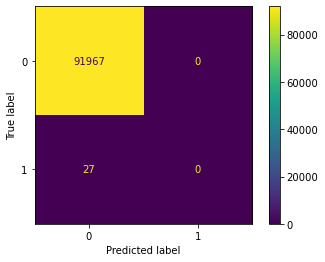

In [334]:
# Creando la matriz de confusion
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_precision_recall_curve,plot_roc_curve

def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds, y_test))
    plot_confusion_matrix(model, X_test, y_test)
    
print("LOGISTIC REGRESSION MODEL")
report(classifier)



In [ ]:
! pip install imbalanced-learn

### Severo desbalanceo de datos

Se aplican 3 metodos para reducir el desbalanceo de los datos

In [335]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
## Metodo 1 
s= SMOTE()
## Metodo 2
smt= SMOTETomek()
## Metodo 3
tk= TomekLinks()
X_res, y_res= s.fit_resample(X_train, y_train)
X_res1, y_res1= smt.fit_resample(X_train, y_train)
X_res2, y_res2= tk.fit_resample(X_train, y_train)

### Metodo 1 (SMOTE) para balanceo aplicado a Regresion Logistica

In [336]:
classifier.fit(X_res, y_res)

LogisticRegression(random_state=42, solver='liblinear')

LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     72397
           1       0.89      0.00      0.00     19597

    accuracy                           0.79     91994
   macro avg       0.84      0.50      0.44     91994
weighted avg       0.81      0.79      0.69     91994



c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


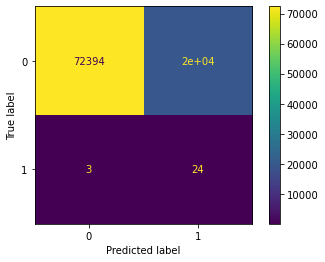

In [337]:
def report(model2):
    preds = model2.predict(X_test)
    print(classification_report(preds, y_test))
    plot_confusion_matrix(model2, X_test, y_test)
    
print("LOGISTIC REGRESSION MODEL")
report(classifier)

### Metodo 2

In [338]:
classifier.fit(X_res1, y_res1)

LogisticRegression(random_state=42, solver='liblinear')

LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     72390
           1       0.89      0.00      0.00     19604

    accuracy                           0.79     91994
   macro avg       0.84      0.50      0.44     91994
weighted avg       0.81      0.79      0.69     91994



c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


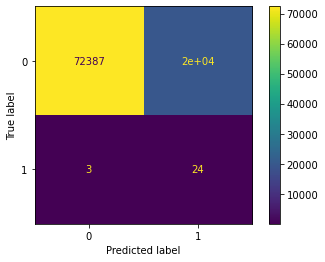

In [339]:
def report(model2):
    preds2 = model2.predict(X_test)
    print(classification_report(preds2, y_test))
    plot_confusion_matrix(model2, X_test, y_test)
    
print("LOGISTIC REGRESSION MODEL")
report(classifier)

### Metodo 3

In [340]:
classifier.fit(X_res2, y_res2)

LogisticRegression(random_state=42, solver='liblinear')

LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     91994
           1       0.00      0.00      0.00         0

    accuracy                           1.00     91994
   macro avg       0.50      0.50      0.50     91994
weighted avg       1.00      1.00      1.00     91994



c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muril\anaconda3\envs\c

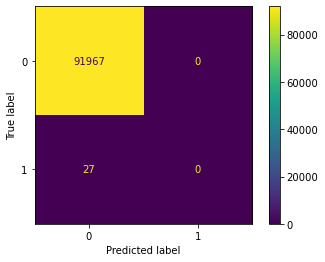

In [341]:
def report(model2):
    preds2 = model2.predict(X_test)
    print(classification_report(preds2, y_test))
    plot_confusion_matrix(model2, X_test, y_test)
    
print("LOGISTIC REGRESSION MODEL")
report(classifier)

### Metodo 4

Weighted LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     91853
           1       0.00      0.00      0.00       141

    accuracy                           1.00     91994
   macro avg       0.50      0.50      0.50     91994
weighted avg       1.00      1.00      1.00     91994



c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and w

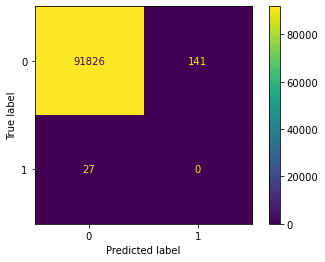

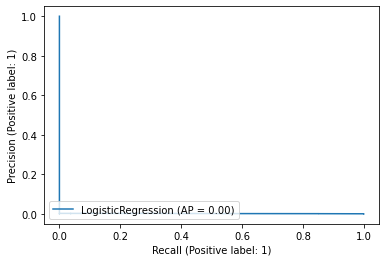

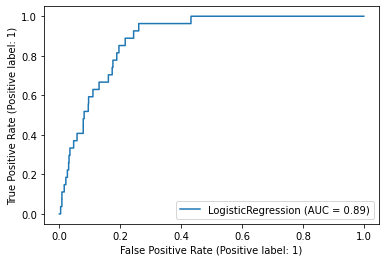

In [342]:
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix,
                             roc_curve, 
                             roc_auc_score, 
                             precision_score, 
                             recall_score, 
                             precision_recall_curve)
from sklearn.metrics import f1_score
# define class weights
w = {0:1, 1:99} 
# define model
lg2 = LogisticRegression(random_state=42, class_weight=w)
# fit it
lg2.fit(X_train,y_train)
def report(model):
    preds = lg2.predict(X_test)
    print(classification_report(preds, y_test))
    plot_confusion_matrix(lg2, X_test, y_test)
    plot_precision_recall_curve(lg2, X_test, y_test)
    plot_roc_curve(lg2, X_test, y_test)
print("Weighted LOGISTIC REGRESSION MODEL")
report(lg2)

## K Nearest Neighbors

In [350]:
from sklearn.neighbors import KNeighborsClassifier
knnclassif = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)


In [353]:
knnclassif.fit(X_res, y_res)

KNeighborsClassifier(n_neighbors=3)

KNN MODEL
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     91405
           1       0.04      0.00      0.00       589

    accuracy                           0.99     91994
   macro avg       0.52      0.50      0.50     91994
weighted avg       0.99      0.99      0.99     91994



c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


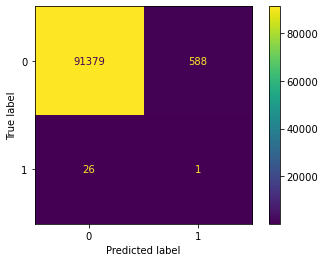

In [354]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds, y_test))
    plot_confusion_matrix(model, X_test, y_test)
    
print("KNN MODEL")
report(knnclassif)

## Random Forest

In [361]:
from sklearn.ensemble import RandomForestClassifier
rfclassif = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rfclassif.fit(X_res1, y_res1)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

RandomForest MODEL
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     91836
           1       0.00      0.00      0.00       158

    accuracy                           1.00     91994
   macro avg       0.50      0.50      0.50     91994
weighted avg       1.00      1.00      1.00     91994



c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


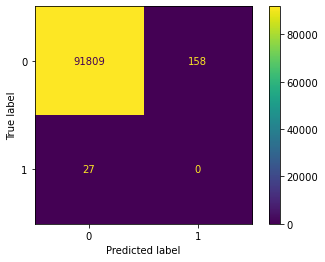

In [362]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds, y_test))
    plot_confusion_matrix(model, X_test, y_test)
    
print("RandomForest MODEL")
report(rfclassif)

In [367]:
from sklearn.svm import SVC
svmclassifi = SVC(kernel = 'linear', random_state = 42)
svmclassifi.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

RandomForest MODEL


c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muril\anaconda3\envs\c

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     91994
           1       0.00      0.00      0.00         0

    accuracy                           1.00     91994
   macro avg       0.50      0.50      0.50     91994
weighted avg       1.00      1.00      1.00     91994



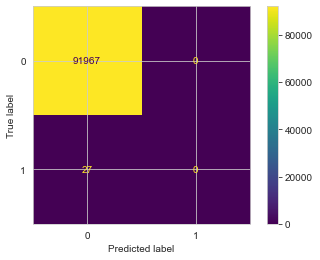

In [369]:
def report(model3):
    preds = model3.predict(X_test)
    print(classification_report(preds, y_test))
    plot_confusion_matrix(model3, X_test, y_test)
    
print("RandomForest MODEL")
report(svmclassifi)

## Conclusion Desafio 13

Se logro alcanzar solamente una accuracy de 79 aplicando la tecnica de SMOTE. A pesar de la aplicacion de las tecnicas de balanceo, el modelo sigue presentando dificultades para predecir las instancias de falla.
Cabe destacar que en una primera instancia lo logro predecir ni un solo evento de falla. 